<a href="https://colab.research.google.com/github/SunnySuh/Display_Sensor_Anomaly_Analysis/blob/main/Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
data_final=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Display_Sensor_Anomaly_Analysis/final_processing_data.csv",index_col='dat...date.name.')
data_final

,X1WOS45106_PV,X1WOS45107_PV,X1WOS45109_PV,DCS_Offset_RPM_M11.1WOS45111_PV,DCS_Offset_RPM_M15.1WOS45115_PV,DAMP.POSITION.0.BAY.CTRL.1TIC33420.PV,DB.N2.SCREEN.FLOW.LEFT.1FI49011_PV,N2.TO.EA1313A.1FI33503A_PV,ROOF.HEATING.Zone.1.1JIC31101.PV,ROOF.HEATING.Zone.2.1JIC31102.PV,ROOF.HEATING.Zone.3.1JIC31103.PV,ROOF.HEATING.Zone.4.1JIC31104.PV,ATM.FLOW.SECT.9.N2.1FIC33415.PV,Gross.width,Left.edge,LOWER.AB7.Z92.TMP.1TIC41751.PV,UPPER.C2..Z169.TMP.1TIC42301.PV,LIFT.OUT.ROL.MTR.M1.CUR.1WII40101.PV,LIFT.OUT.ROL.MTR.M2.CUR.1WII40102.PV,LEHR.DRV.MTR..M4.1.CUR.1WII40104.PV,LEHR.DRV.MTR..M6.1.CUR.1WII40108.PV,LEHR.DRV.MTR..M7.1.CUR.1WII40110.PV,LEHR.DRV.MTR..M7.2.CUR.1WII40111.PV,LEHR.DRV.MTR..M8.1.CUR.1WII40112.PV,LEHR.DRV.MTR..M8.2.CUR.1WII40113.PV,LEHR.DRV.MTR..M11.1.CUR.1WII40118.PV,LEHR.DRV.MTR..M12.1.CUR.1WII40120.PV,LEHR.DRV.MTR..M13.1.CUR.1WII40122.PV,LEHR.DRV.MTR..M15.1.CUR.1WII40126.PV,LEHR.DRV.MTR..M16.1.CUR.1WII40128.PV,LEHR.DRV.MTR..M16.2.CUR.1WII40129.PV,LEHR.DRV.MTR..M17.1.CUR.1WII40130.PV,LEHR.DRV.MTR..M18.1.CUR.1WII40132.PV,LEHR.DRV.MTR..M18.2.CUR.1WII40133.PV,LEHR.DRV.MTR..M19.1.CUR.1WII40134.PV,X1WOS45102_PV.1,X1WOS45106_PV.1,DCS_Offset_RPM_M11.1WOS45111_PV.1,DCS_Offset_RPM_M14.1WOS45114_PV.1,TMP.GLASS..BAY.6.1TI30106.PV,...,D_AB4_L_LR,D_AB5_U_LR,D_AB6_U_LR,D_AB7_U_LR,D_AB8_U_LR,D_AB8_L_LR,D_AB9_U_LR,D_AB10_U_LR,D_AB11_U_LR,D_AB11_L_LR,D_AB2_L_UL,D_AB3_L_UL,D_AB4_L_UL,D_AB7_L_UL,D_AB11_L_UL,D_C1_U_LR,D_C1_L_LR,D_C2_L_LR,D_C3_U_LR,D_C4_U_LR,D_C4_L_LR,D_C2_L_UL,D_GLS_AB11_LR,D_GLS_F_LR,D_GLS_RET_LR,S_AB1_AB2_L_L,S_AB2_AB3_L_L,S_AB3_AB4_U_L,S_AB4_AB5_U_L,S_AB5_AB6_U_L,S_AB6_AB7_U_L,S_AB7_AB8_U_L,S_AB8_AB9_U_L,S_AB9_AB10_U_L,S_AB10_AB11_U_L,S_C1_C2_L_L,S_C2_C3_L_L,S_C3_C4_U_L,L.RD,L.Vac
dat...date.name.,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-01 07,0.126294,0.076956,0.076956,0.147152,-0.227141,-1.006303,-1.514135,-0.218748,0.048973,-3.879360,-2.296037,0.191359,-0.022694,3.027949,2.433864,1.290385,0.609797,2.803512,2.180684,-0.011076,0.07524,0.01758,-0.02383,5.289937,-0.237516,-0.171091,-0.102056,-0.017896,0.858553,0.008717,0.015664,0.011076,-0.133738,0.011076,1.531614,-0.911596,5.486833,5.271747,6.241618,-0.223438,...,0.159519,-0.866448,-0.342356,0.200921,-0.693145,-2.587497,-0.321218,1.183474,0.671758,2.048795,-1.915046,2.138599,1.871305,-0.414553,-1.876764,1.014661,-0.693113,0.367878,1.935018,0.878525,1.400976,1.264824,-0.331785,0.392527,-1.204339,-0.490492,0.809818,0.332690,0.040088,-0.377177,-0.377875,1.128218,1.012915,-0.398517,0.143574,-0.195736,0.491620,2.776941,0.025,0.063
2016-01-01 08,0.126294,0.076956,0.076956,0.147152,-0.227141,-1.006303,-1.514135,-0.218748,0.048973,-3.879360,-2.296037,0.191359,-0.022694,3.053693,2.392478,1.189370,0.653086,2.808048,1.598043,-0.011076,0.07524,0.01758,-0.02383,4.508077,-0.237516,-0.171091,-0.102056,-0.017896,0.858553,0.008717,0.015664,0.011076,-0.133738,0.011076,1.531614,-1.570853,-0.098112,0.015846,-0.080082,-0.221490,...,0.233349,-0.885489,-0.195488,0.514619,-0.570024,-2.492526,-0.256311,1.194699,0.569452,2.015731,-1.889054,2.146302,1.768361,-0.302930,-1.829911,0.978115,-0.866477,0.637316,1.945713,0.765455,1.269891,1.253210,-0.201602,0.643118,-0.700142,-0.506972,0.789363,0.363847,0.030658,-0.404578,-0.479823,0.913786,1.043599,-0.367705,0.235959,-0.500742,0.587871,2.888919,0.000,0.022
2016-01-01 09,0.126294,0.076956,0.076956,0.147152,-0.227141,-1.006303,-1.514135,-0.218748,0.048973,-3.879360,-2.296037,0.191359,-0.022694,3.079437,2.433864,1.041403,0.646011,1.921064,1.598020,-0.011076,0.07524,0.01758,-0.02383,5.371871,-0.237516,-0.171091,-0.102056,-0.017896,0.858553,0.008717,0.015664,0.011076,2.421443,0.011076,1.531614,-1.570853,-0.098112,0.015846,-0.080082,-0.112618,...,0.470395,-0.872139,-0.091800,0.519699,-0.510859,-2.464777,-0.292379,1.275461,0.585925,2.181967,-1.921117,2.341416,1.668978,-0.312238,-1.786911,1.060357,-0.817840,0.492432,1.989144,0.648465,1.058985,1.517443,-0.001965,0.893808,-0.499177,-0.520331,0.839029,0.376583,0.1461

In [ ]:
X=data_final.drop('L.RD',axis=1)
X_final=X.drop('L.Vac',axis=1)
y=data_final['L.RD']
#y=data_final['L.Vac']


In [ ]:
y

dat...date.name.
2016-01-01 07    0.025
2016-01-01 08    0.000
2016-01-01 09    0.016
2016-01-01 10    0.000
2016-01-01 11    0.000
                 ...  
2016-12-31 19    0.000
2016-12-31 20    0.010
2016-12-31 21    0.017
2016-12-31 22    0.000
2016-12-31 23    0.000
Name: L.RD, Length: 8145, dtype: float64

In [ ]:
#레이블 기준으로 0.01이상 인  경우는  1, 그 이하는  0
import numpy as np
#labels_cla = pd.DataFrame(np.where(labels >= 0.01, 1, 0), columns = labels.columns)
y=pd.Series(np.where(y>=0.01, 1, 0))
y=y.astype('int')

In [ ]:
#데이터 테스트데이터 트레인데이터나누기
from sklearn.model_selection import train_test_split 
#X_final =pd.DataFrame(X_final)
y= pd.DataFrame(y)
X_train, X_test, y_train, y_test = train_test_split(X_final, y)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

#DecisioTree Classifier 생성
dt_clf=DecisionTreeClassifier(random_state=156,max_leaf_nodes=20 )

#DecisioTree Classifier 학습
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=20,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=156, splitter='best')

In [ ]:
from sklearn.tree import export_graphviz

export_graphviz(dt_clf,out_file="tree.dot",feature_names=X_train.columns,impurity=True,filled=True)


In [ ]:
%pwd

'/content'

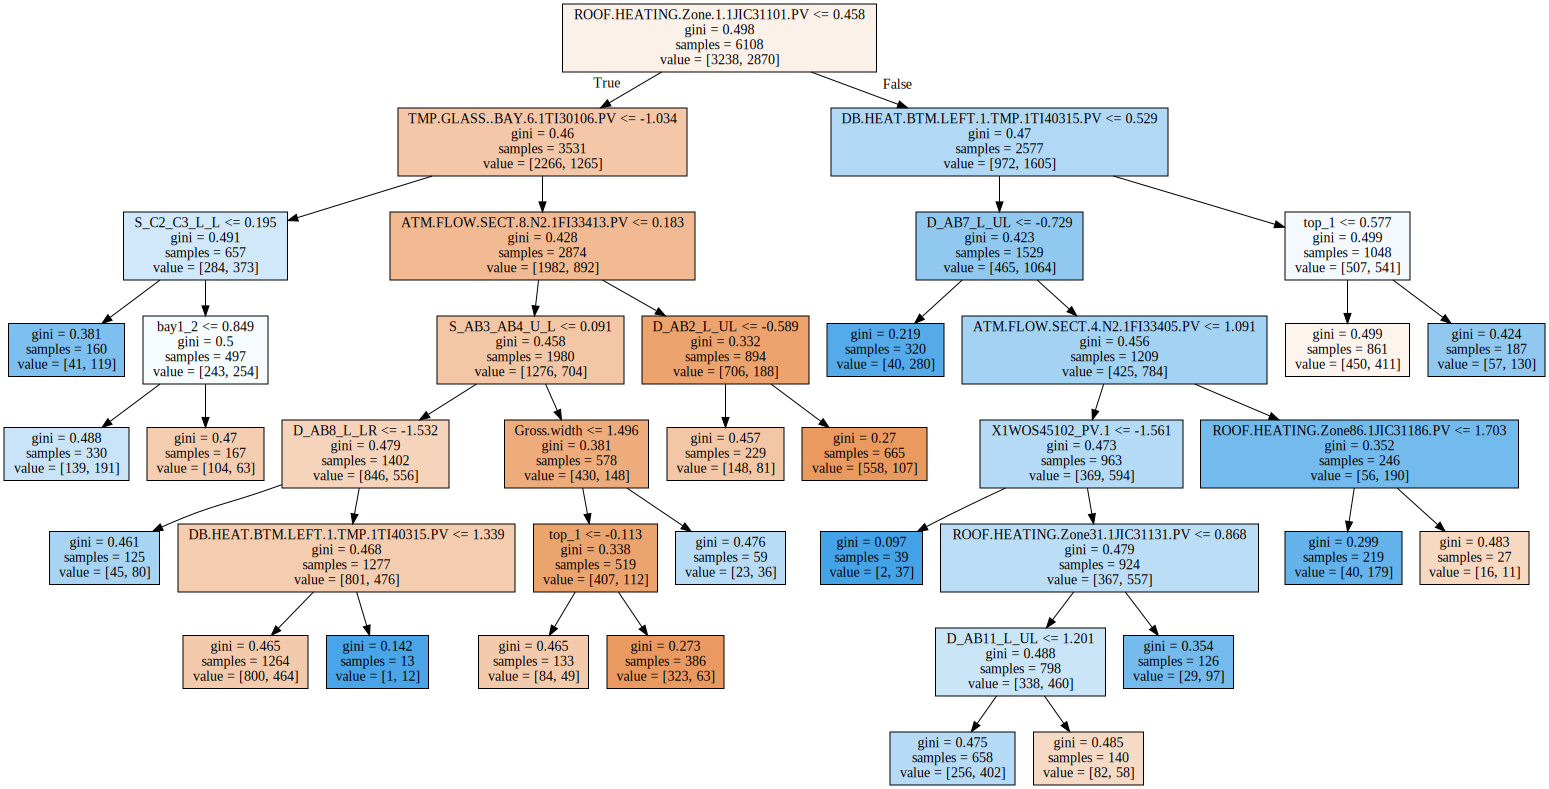

In [ ]:
#시각화
import graphviz
with open("tree.dot") as f:
  dot_graph=f.read()
graphviz.Source(dot_graph)

In [ ]:
# .dot 파일로 export 해줍니다
export_graphviz(dt_clf,
                feature_names=X_train.columns,
                out_file='1_randomForest_LRD_5p_MinMax.dot',
                # max_depth = 10, # 표현하고 싶은 최대 depth
                precision = 3, # 소수점 표기 자릿수
                filled = True, # class별 color 채우기
                rounded=True # 박스의 모양을 둥글게
                )
# 생성된 .dot 파일을 .png로 변환
from subprocess import call
call(['dot', '-Tpng','1_randomForest_LRD_5p_MinMax.dot', '-o', '1_randomForest_LRD_5p_MinMax.png', '-Gdpi=600'])

0

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

tree = DecisionTreeClassifier(max_depth=None, criterion='entropy', random_state=1)
## 500 개의 DecisionTree 사용
forest = RandomForestClassifier(criterion='gini', n_estimators=165, random_state=1)
forest.fit(X_train,y_train)
clf_labels = ['Decision tree', 'Random forest']
all_clf = [tree, forest]


                                   col_nm    imp_no
39           TMP.GLASS..BAY.6.1TI30106.PV  0.014252
84       ROOF.HEATING.Zone57.1JIC31157.PV  0.013755
55     DB.HEAT.BTM.LEFT.1.TMP.1TI40315.PV  0.013102
104       ATM.N2.H2.5..함유율.1CLFI33402_CPV  0.012066
51      N2.TO.HOOD.UP.STREAM.1FI33506A_PV  0.011647
..                                    ...       ...
88       ROOF.HEATING.Zone77.1JIC31177.PV  0.000003
19    LEHR.DRV.MTR..M4.1.CUR.1WII40104.PV  0.000000
82       ROOF.HEATING.Zone54.1JIC31154.PV  0.000000
30   LEHR.DRV.MTR..M16.2.CUR.1WII40129.PV  0.000000
31   LEHR.DRV.MTR..M17.1.CUR.1WII40130.PV  0.000000

[163 rows x 2 columns]


(-1.0, 163.0)

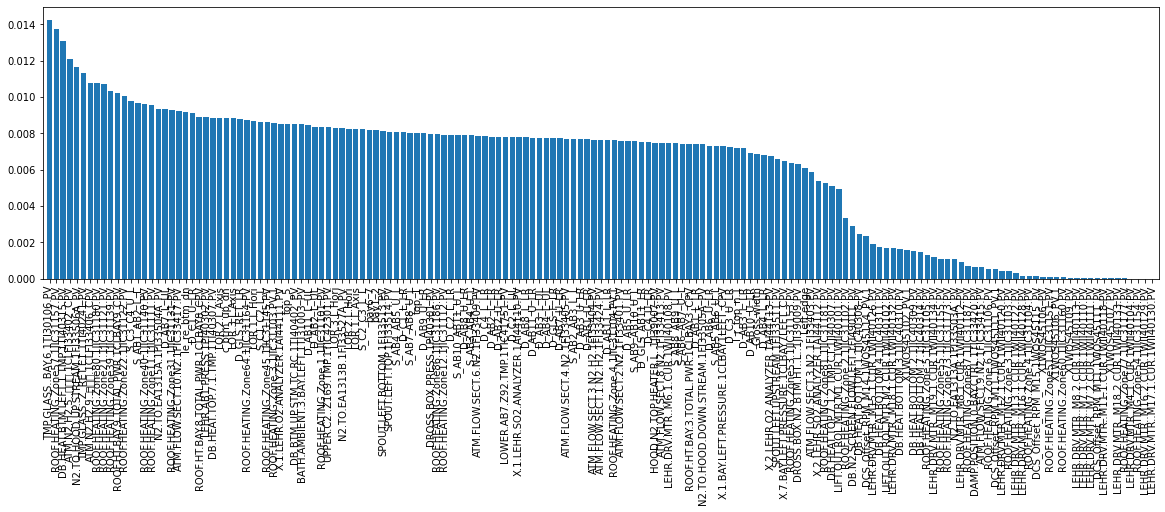

In [ ]:
# 6. 변수 중요도 보기
import pandas as pd
import matplotlib.pyplot as plt
df=pd.DataFrame({'col_nm':X_train.columns, 'imp_no':forest.feature_importances_ })
df=df.sort_values(by='imp_no',ascending =False)
print(df)

#plt.title('Feature Importance')
plt.figure(figsize=(20,5))
plt.bar(range(X_train.shape[1]), df.imp_no, align='center')
plt.xticks(range(X_train.shape[1]), df.col_nm, rotation=90)
plt.xlim([-1, X_train.shape[1]])
#plt.tight_layout()
#plt.show()